<h1>K-means Clustering<h1>

In [309]:
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

In [310]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [311]:
scaler = MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df[['sepal length (cm)']] = scaler.transform(df[['sepal length (cm)']])
scaler.fit(df[['sepal width (cm)']])
df[['sepal width (cm)']] = scaler.transform(df[['sepal width (cm)']])
scaler.fit(df[['petal length (cm)']])
df[['petal length (cm)']] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df[['petal width (cm)']] = scaler.transform(df[['petal width (cm)']])
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056
std,0.230018,0.181611,0.299203,0.317599
min,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.567797,0.500000
75%,0.583333,0.541667,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


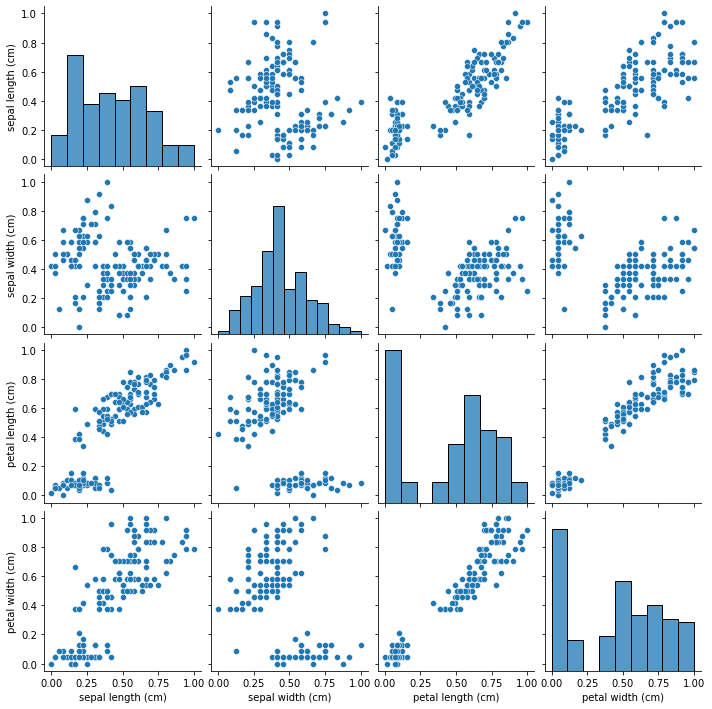

In [312]:
x = df.drop('species', axis='columns')
sb.pairplot(x)

In [313]:
k_rng = range(1, 11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(x)
    sse.append(km.inertia_)

In [314]:
sse

[41.16611042137328,
 12.12779075053819,
 6.982216473785234,
 5.516933472040375,
 4.5809486401172945,
 3.924200114140734,
 3.475319732216734,
 3.156135934010284,
 2.844193757611174,
 2.534927764552524]

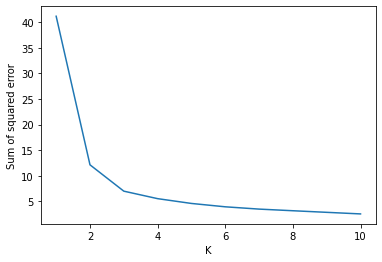

In [315]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

In [316]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(x)

y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [317]:
centroids =km.cluster_centers_
centroids

array([[0.19611111, 0.595     , 0.07830508, 0.06083333],
       [0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.44125683, 0.30737705, 0.57571548, 0.54918033]])

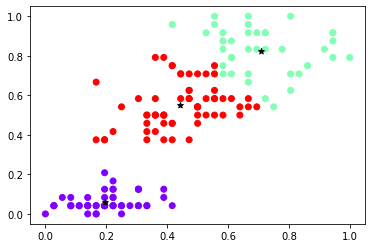

In [318]:
x = df.iloc[:, [0,1,2,3]].values
plt.scatter(x[:, 0], x[:, 3], c = y_predicted, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 3], color = 'black', marker='*', label='centroid')